In [163]:
require(forecast)
require(tseries)
# install.packages("rugarch")
library(ggplot2)
library(zoo)
library(tsutils)
require(rugarch)
require(ugarchspec)
options(warn=-1)

Loading required package: ugarchspec



<div class="alert alert-block alert-info">
<b> </b>
</div>

# Bitcoin prediction

<div class="alert alert-block alert-info">
<b> </b>
</div>

## Load the data set

+ The dataset is based on the Bitcoin (BTC) value vs USD extracted from the trading platform Coinbase.
+ It has the movements of Bitcoin stock (Open, High, Low and Close) in a daily manner.
+ The data was extracted on June the 4th 2020.

<div class="alert alert-block alert-info">
<b> </b>
</div>

In [164]:
Bitcoin = read.table('Coinbase_BTCUSD_daily.csv', sep=',', header = T)
head(Bitcoin,7)
Bitcoin

,Date,Symbol,Open,High,Low,Close,Volume.BTC,Volume.USD
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-06-04,BTCUSD,9668.07,9689.84,9601.01,9637.12,563.76,5446482
2,2020-06-03,BTCUSD,9522.46,9668.29,9385.22,9668.07,6384.32,60912269
3,2020-06-02,BTCUSD,10219.97,10237.59,9285.39,9522.46,14210.84,139721993
4,2020-06-01,BTCUSD,9446.57,10350.01,9417.42,10219.97,8439.12,81881425
5,2020-05-31,BTCUSD,9700.33,9705.60,9384.54,9446.57,6146.96,58706362
6,2020-05-30,BTCUSD,9423.87,9744.06,9346.81,9700.33,3690.72,35294093
7,2020-05-29,BTCUSD,9580.19,9609.02,9330.01,9423.87,9945.05,94028684


Date,Symbol,Open,High,Low,Close,Volume.BTC,Volume.USD
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-06-04,BTCUSD,9668.07,9689.84,9601.01,9637.12,563.76,5446482
2020-06-03,BTCUSD,9522.46,9668.29,9385.22,9668.07,6384.32,60912269
2020-06-02,BTCUSD,10219.97,10237.59,9285.39,9522.46,14210.84,139721993
2020-06-01,BTCUSD,9446.57,10350.01,9417.42,10219.97,8439.12,81881425
2020-05-31,BTCUSD,9700.33,9705.60,9384.54,9446.57,6146.96,58706362
2020-05-30,BTCUSD,9423.87,9744.06,9346.81,9700.33,3690.72,35294093
2020-05-29,BTCUSD,9580.19,9609.02,9330.01,9423.87,9945.05,94028684
2020-05-28,BTCUSD,9208.53,9625.00,9112.00,9580.19,13637.01,127942111
2020-05-27,BTCUSD,8844.42,9230.00,8811.46,9208.53,10460.35,94984995


### Time domain of the data

In [165]:
Bitcoin_date <- as.Date(Bitcoin$Date)
cat("First date avilable:")
min(Bitcoin_date)
cat("Last date avilable:")
max(Bitcoin_date)

First date avilable:

[1] "2014-12-01"

Last date avilable:

[1] "2020-06-04"

<div class="alert alert-block alert-info">
<b> </b>
</div>

## Let's plot the data

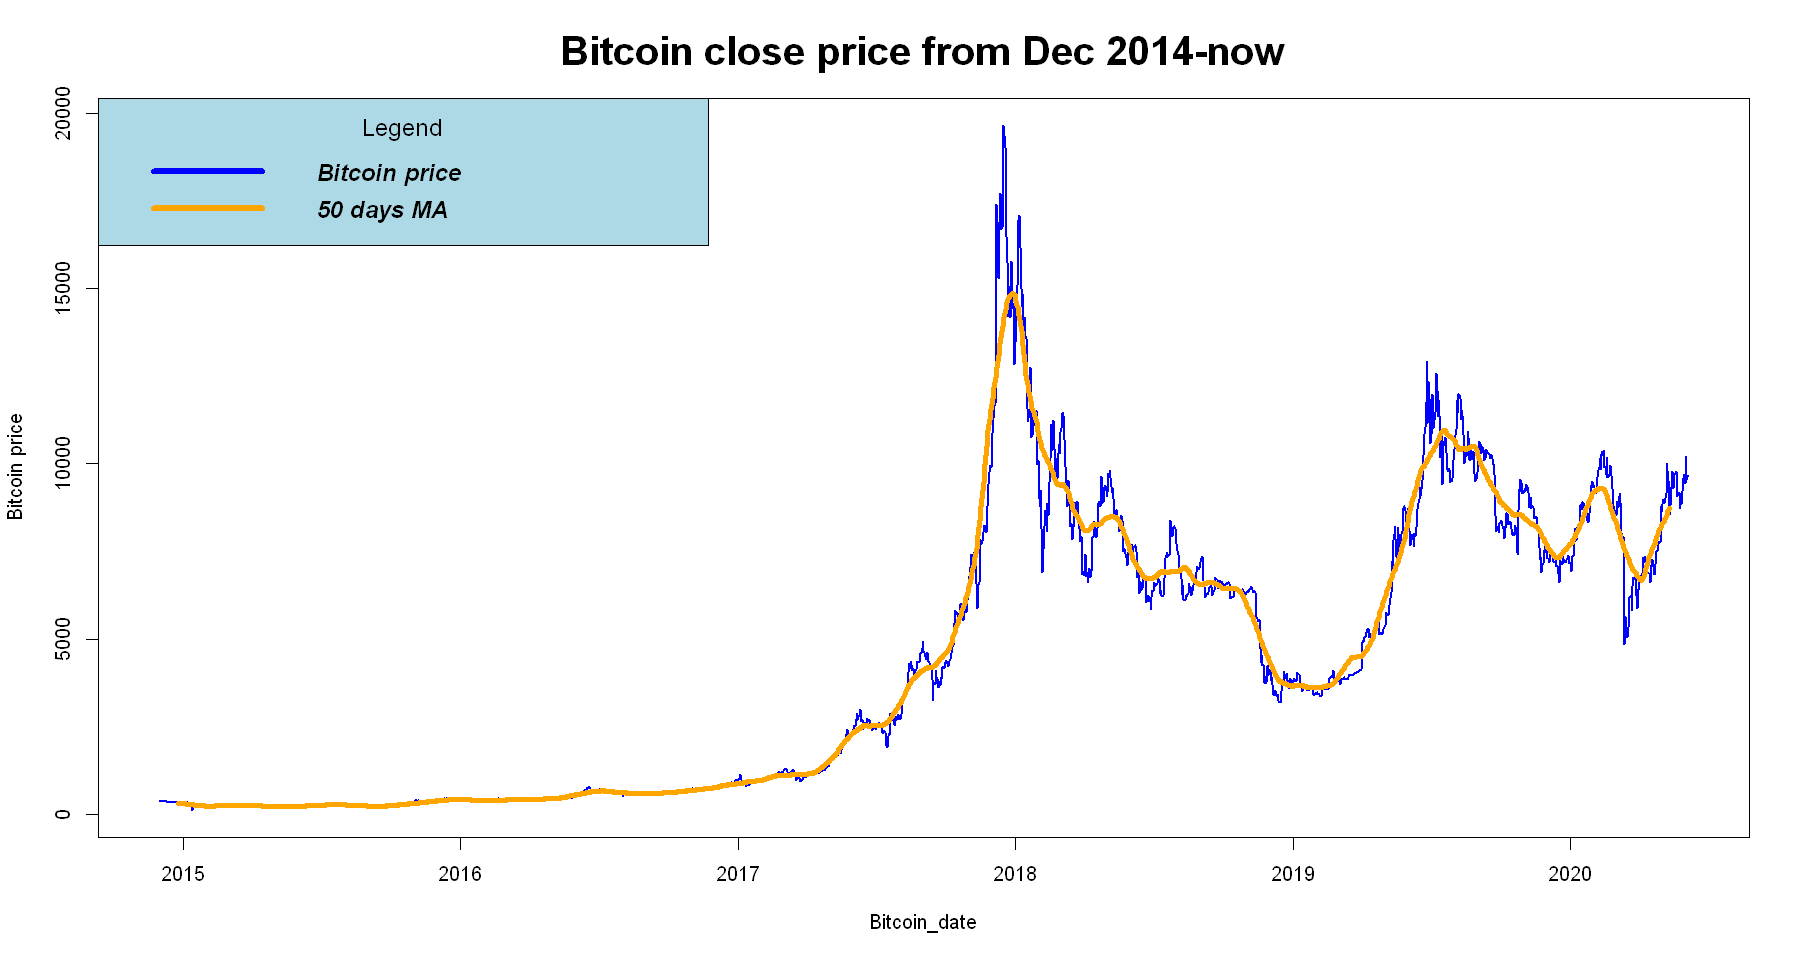

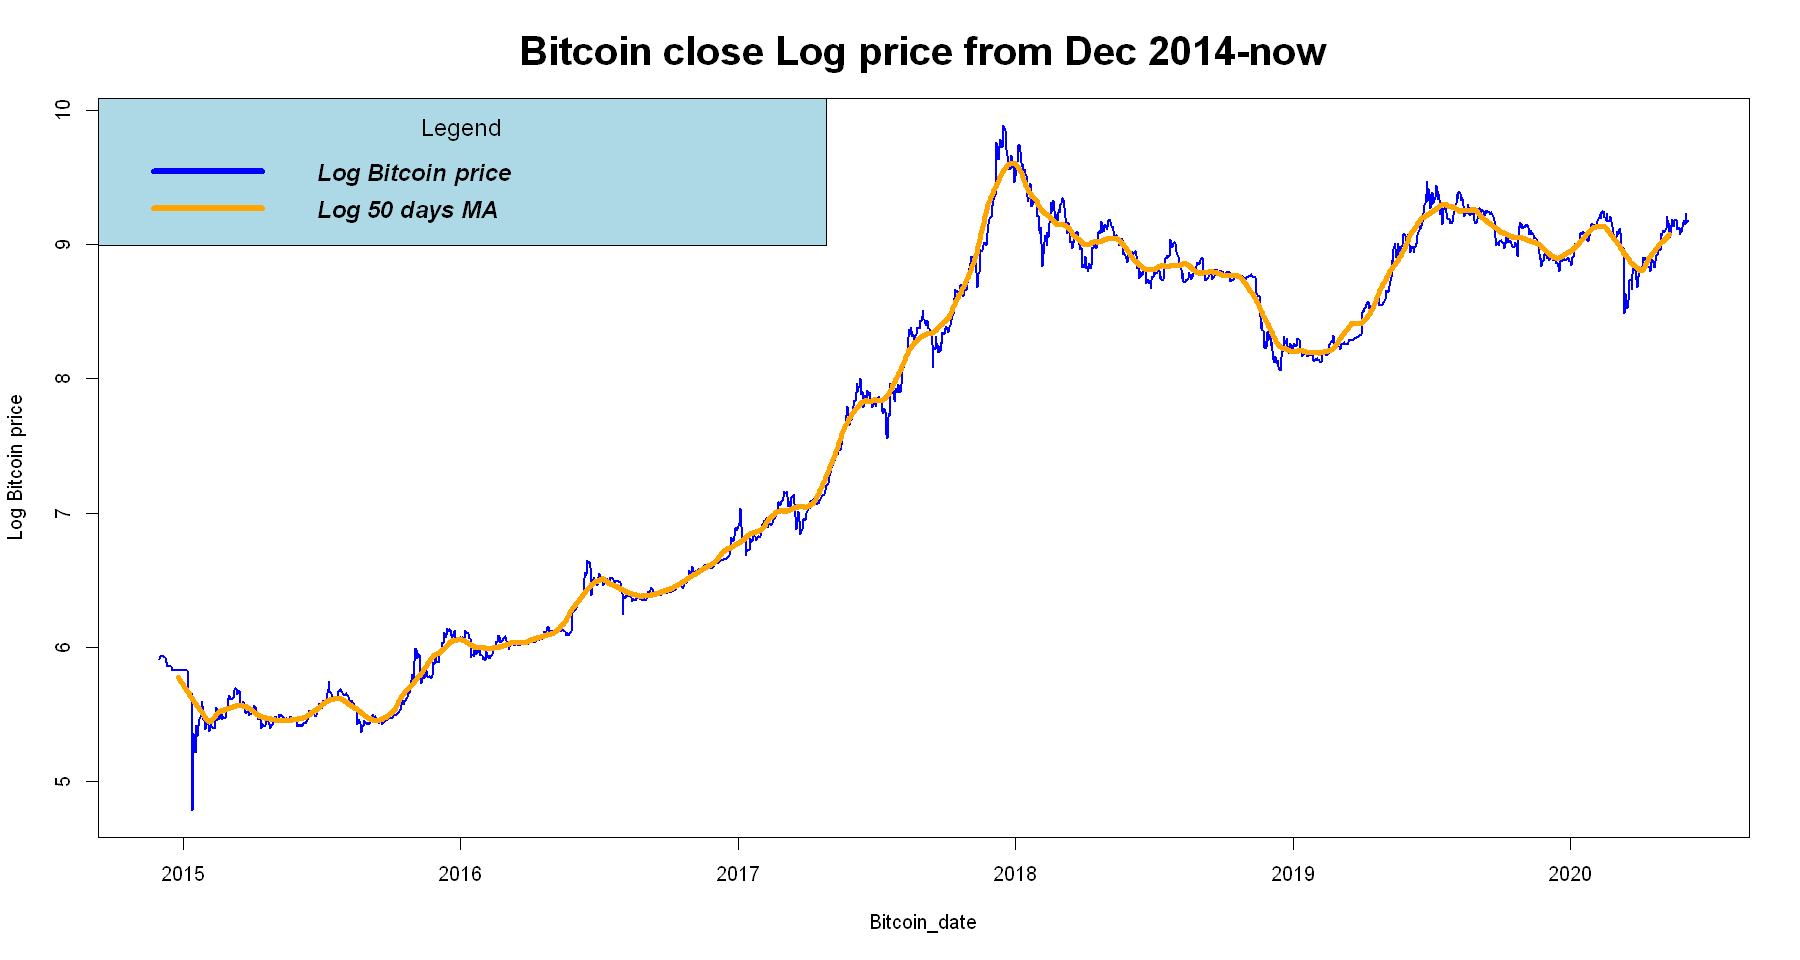

In [166]:
options(repr.plot.width=15,repr.plot.height=8)

### 50 DAYS MOVING AVERAGE
m.av <- ma(Bitcoin$Close, 50)

### BITCOIN PRICE PLOT WITH MA
plot(x = Bitcoin_date, y = Bitcoin$Close, type="l", col="blue", ylab = "Bitcoin price",
     main="Bitcoin close price from Dec 2014-now", cex.main=2, lwd=2) 
lines(x = Bitcoin_date, y = m.av, col="orange", lwd=4)
legend("topleft", legend=c("Bitcoin price", "50 days MA"),
       col=c("blue","orange"), lwd=5, cex=1.2,
       title="Legend", text.font=4, bg='lightblue')

### BITCOIN LOG PRICE PLOT WITH LOG MA
plot(x = Bitcoin_date, y = log(Bitcoin$Close), type="l", col="blue", ylab = "Log Bitcoin price", 
     main="Bitcoin close Log price from Dec 2014-now", cex.main=2, lwd=2)
lines(x = Bitcoin_date, y = log(m.av), col="orange", lwd=4)
legend("topleft", legend=c("Log Bitcoin price", "Log 50 days MA"),
       col=c("blue","orange"), lwd=5, cex=1.2,
       title="Legend", text.font=4, bg='lightblue')

From the plots we can see some key points:
   + The **trend** varies depending on different time intervals. From the drop for Covid-19 outbreak in March 13th, the Bitcoin price has experienced an upwards trend. The 50 days moving average help to better show the different trends.
   + The **volatility** of the market can be depicted as high. From September 2017 to January 2018 the price of Bitcoin increased from $\$$5000 to more than $\$$19.000. That is a 280% increase of the price in less than a quarter.
   + The **variance** of the time series is not always the same. From 2015 to 2017 the price is quite stable while the market capital was low. While from January 2018 to January 2019 the variance has been really high untill the drop in Nobember 2018.
   + There is no visble **seasonality** in the charts of Bitcoin.

<div class="alert alert-block alert-info">
<b> </b>
</div>

## Use only data from 2017 onwards

+ This is because the data from Dec 2014 until early 2017 does not show much change and its market capital was very low.
+ Furthermore, the time series is very different from 2017 onwards. Thus, I decided to trim the data from Dec 2014 until early 2017 out of the analysis for the sake of a better model.

In [167]:
Bitcoin <- Bitcoin[(as.Date(Bitcoin$Date)>= "2017-01-01"),]

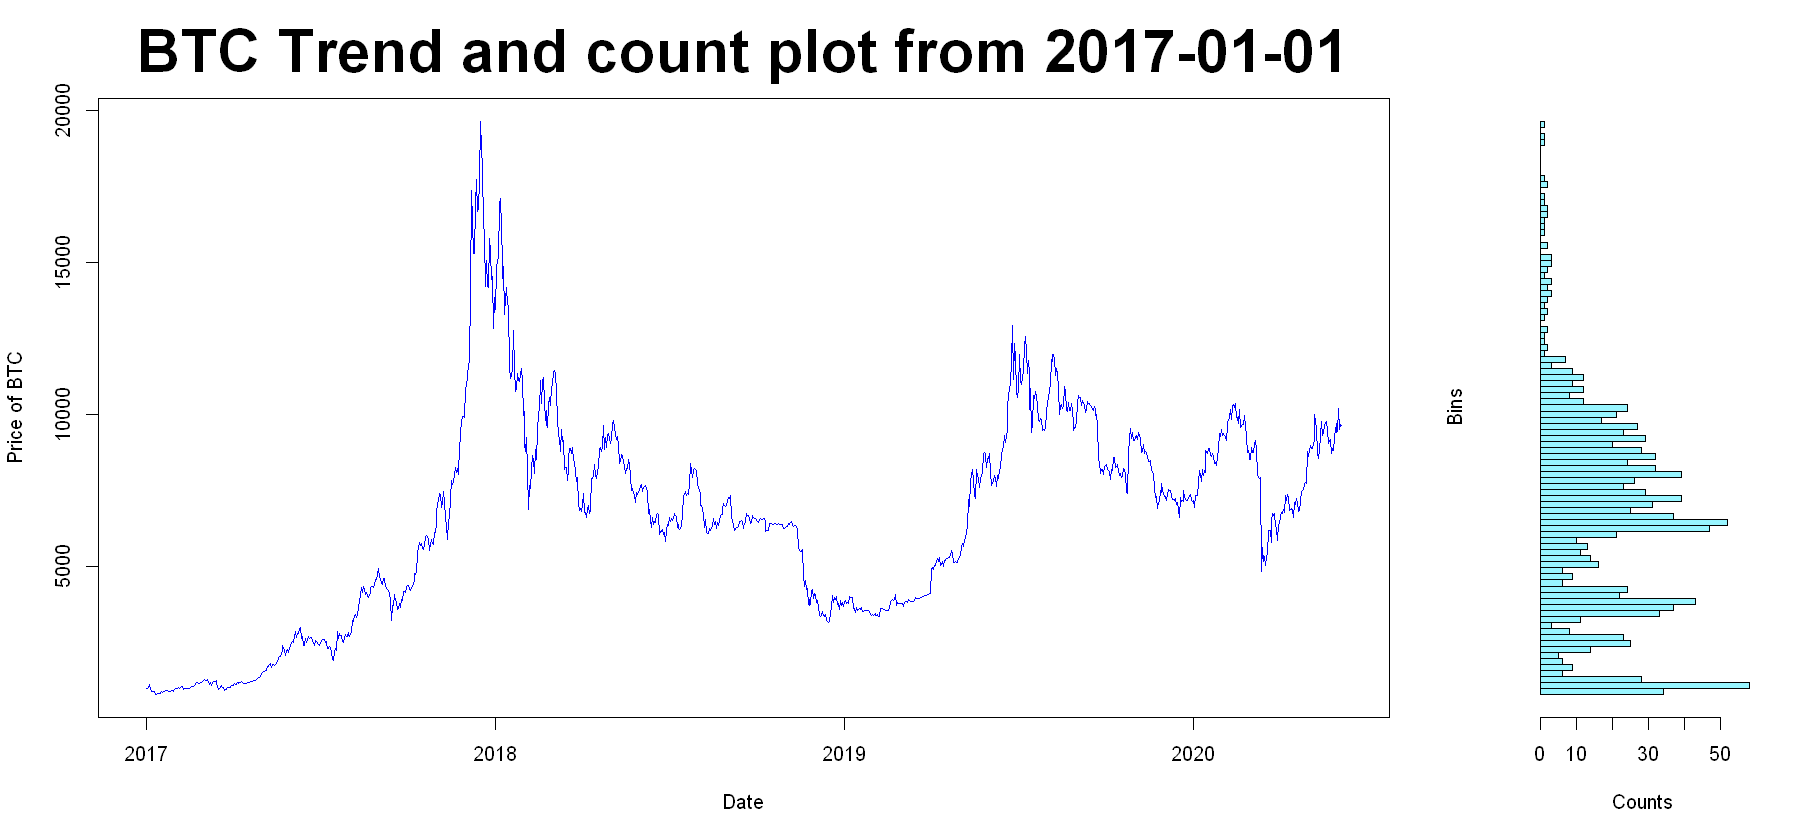

In [168]:
options(repr.plot.width=15,repr.plot.height=7)

### LINEPLOT OF BITCOIN PRICE
par(fig=c(0,0.8,0,1), new=TRUE)
plot(x = as.Date(Bitcoin$Date), y = Bitcoin$Close, type="l",
     main=paste("BTC Trend and count plot from",min(as.Date(Bitcoin$Date))), cex.main = 3, col="blue", 
     xlab= "Date", ylab="Price of BTC")
par(fig=c(0.8,1,0,1),new=TRUE)

### PLOT A HISTOGRAM TO SEE THE SUPPORT VALUES (USED IN TRADING)
xhist <- hist(Bitcoin$Close, breaks = 75, plot = FALSE)
barplot(xhist$counts, space = 0, horiz=TRUE, xlab= "Counts", ylab="Bins", col="cadetblue1")


+ We can see that the main resistences (financial language) are arround $\$$1.000 (begining 2017), $\$$ 4.500 and $\$$ 6.000. But there has been days with a closing price of $\$$ 19.890.

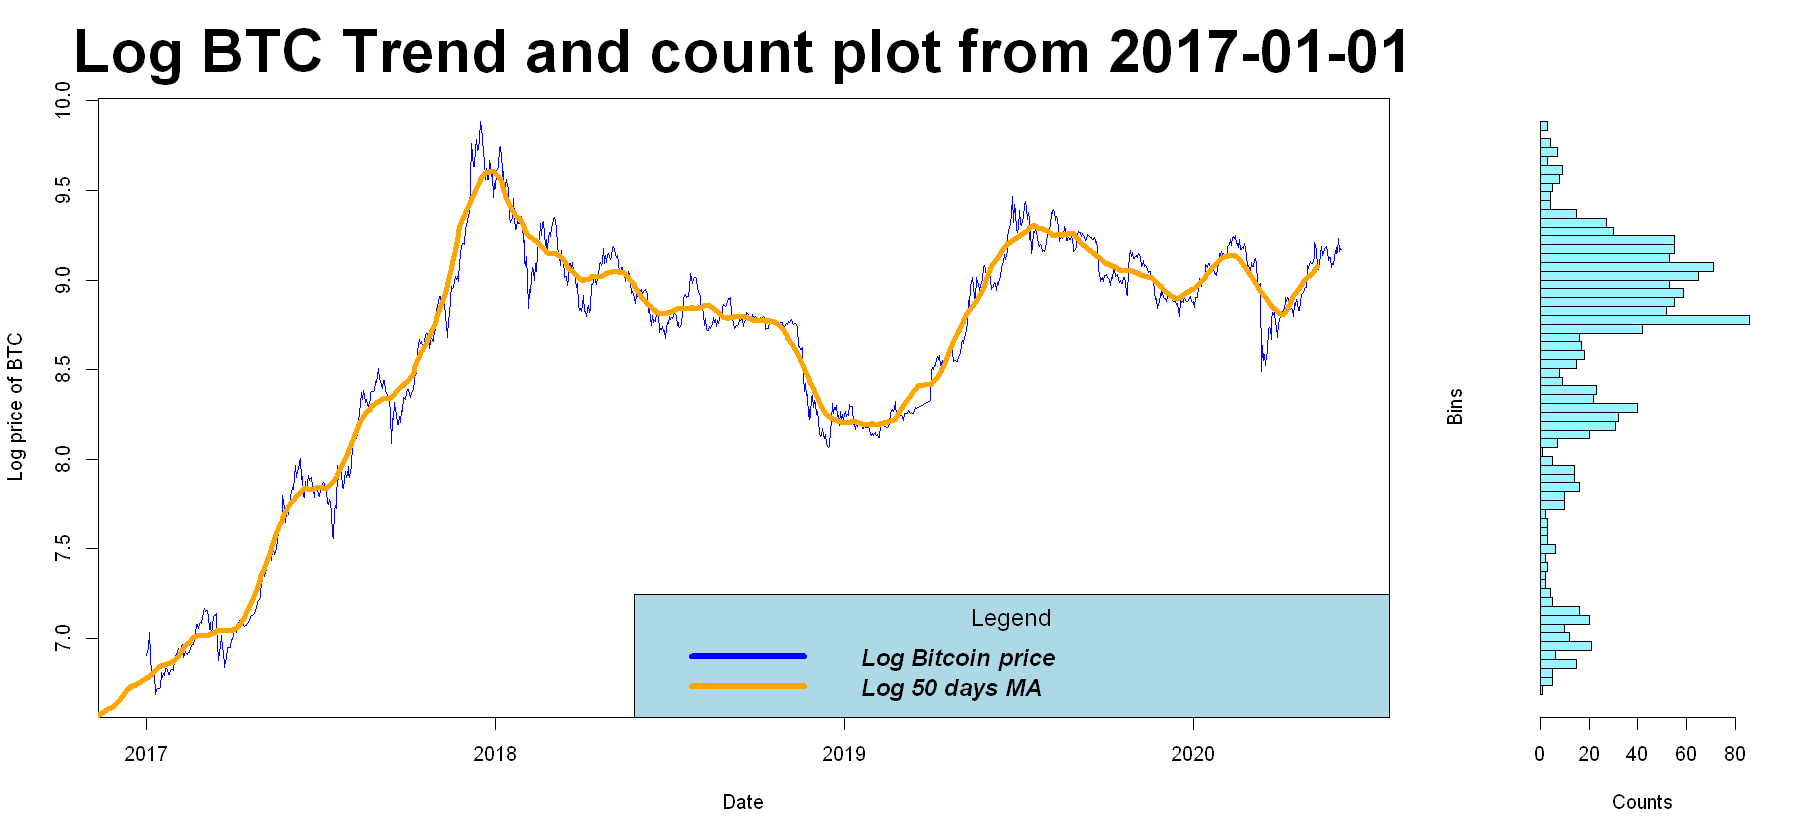

In [169]:
options(repr.plot.width=15,repr.plot.height=7)

### LINEPLOT OF BITCOIN LOG PRICE
par(fig=c(0,0.8,0,1), new=TRUE)
plot(x = as.Date(Bitcoin$Date), y = log(Bitcoin$Close), type="l",
     main=paste("Log BTC Trend and count plot from",min(as.Date(Bitcoin$Date))), 
     cex.main = 3, col="blue", xlab= "Date", ylab="Log price of BTC")
lines(x = Bitcoin_date, y = log(m.av), col="orange", lwd=4)
legend("bottomright", legend=c("Log Bitcoin price", "Log 50 days MA"),
       col=c("blue","orange"), lwd=5, cex=1.2,
       title="Legend", text.font=4, bg='lightblue')
par(fig=c(0.8,1,0,1),new=TRUE)

### PLOT A HISTOGRAM TO SEE THE SUPPORT VALUES
xhist <- hist(log(Bitcoin$Close), breaks = 50, plot = FALSE)
barplot(xhist$counts, space = 0, horiz=TRUE, xlab= "Counts", ylab="Bins", col="cadetblue1")

+ When we look at the log prices plot, we can see more clearly that the data from 2018 onwards has a support arround 8.9 or $\$$ 7330 with a bell shaped distribution.
+ With this plot, the logarithmic nature of bitcoin price can be better apreciated.

<div class="alert alert-block alert-info">
<b> </b>
</div>

## See the Seasonal, trend and residual components
+ From now on we will use the natural Logarithmic transformation to best approach to a stationarity time series.

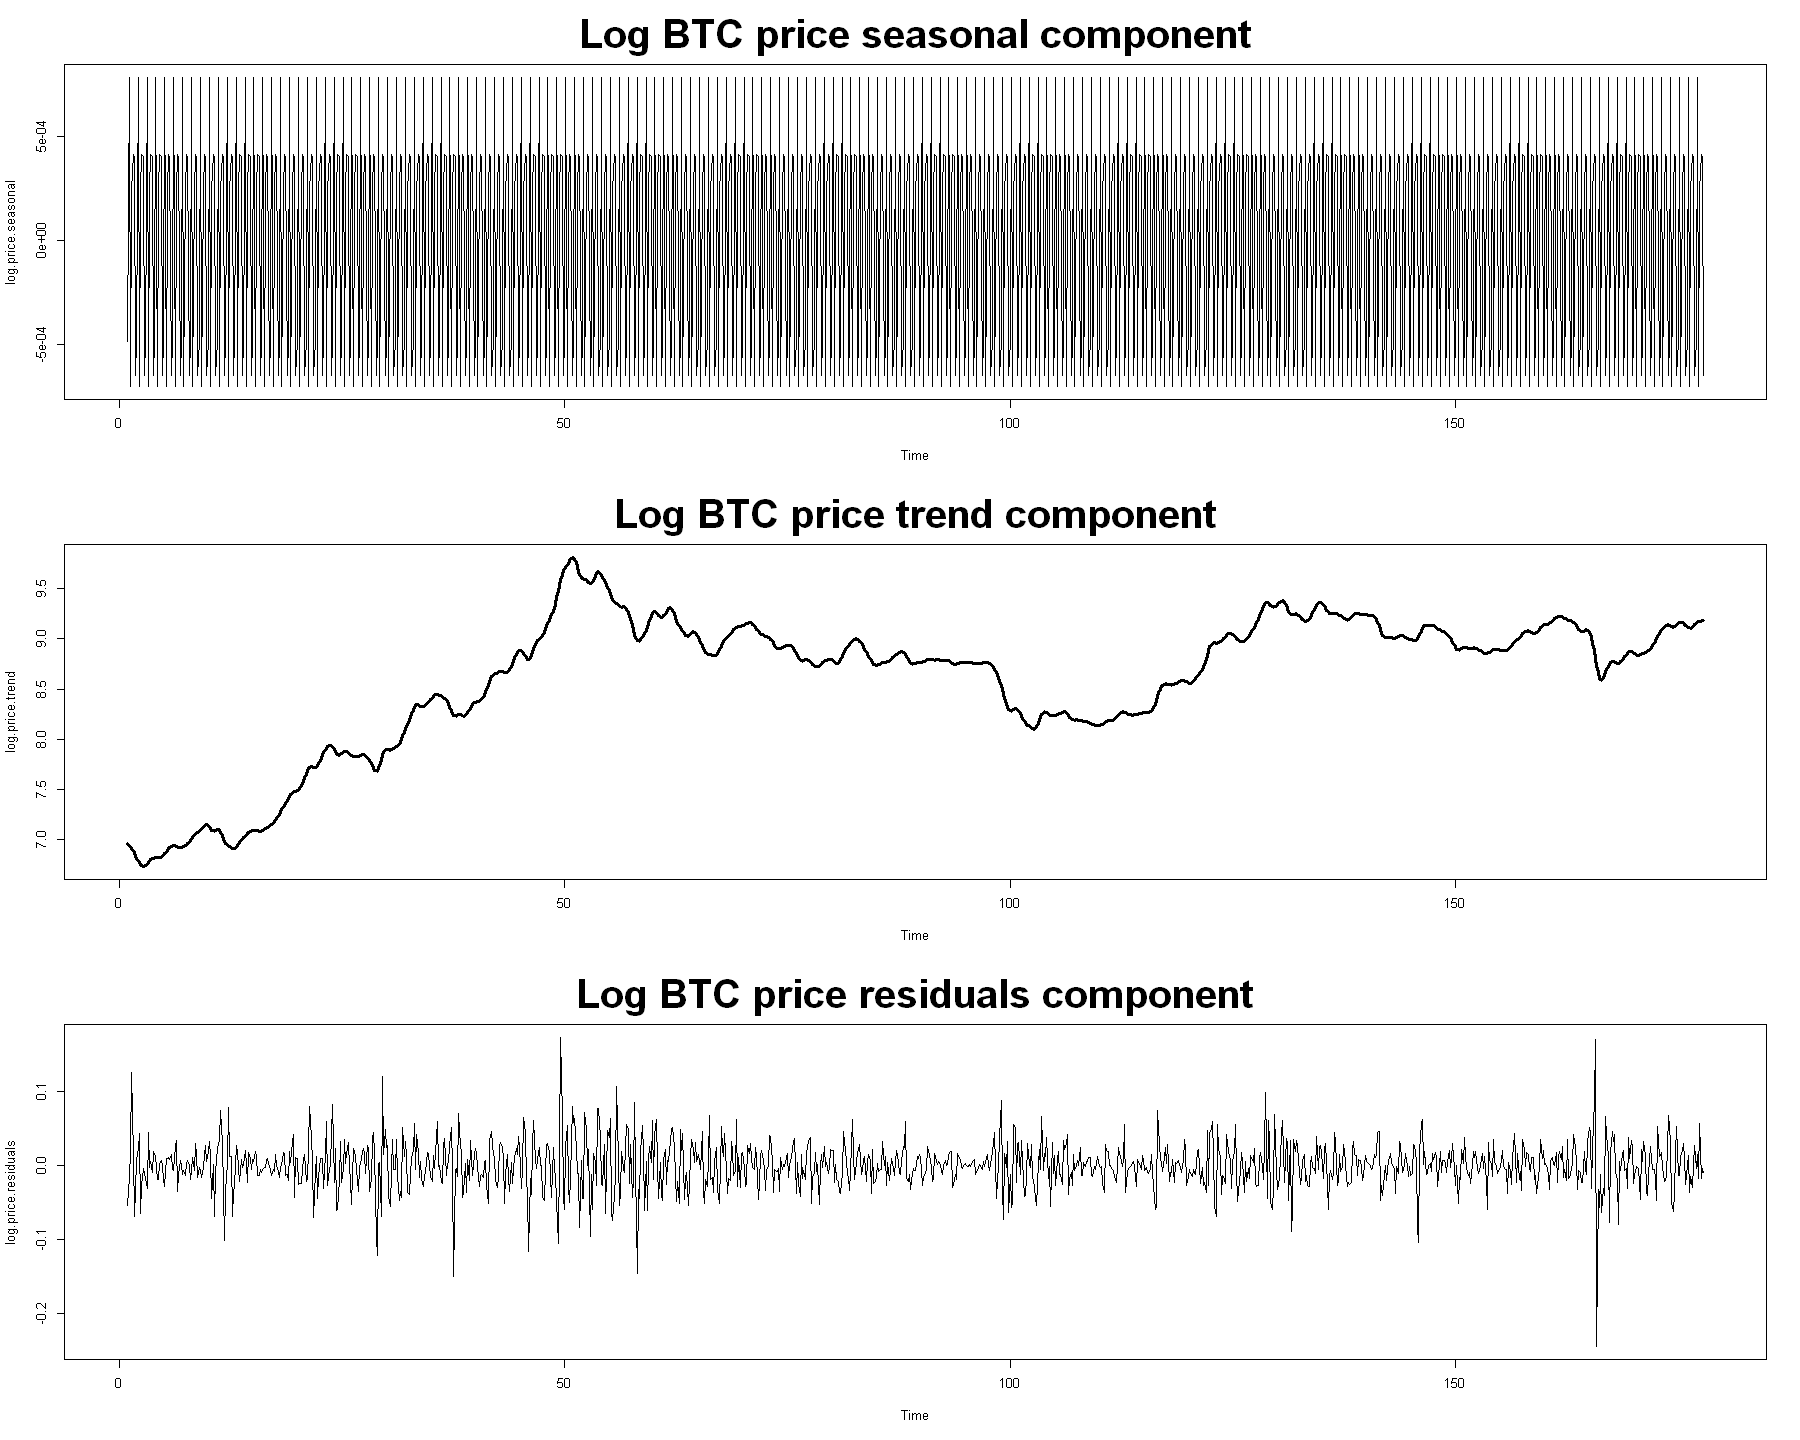

In [170]:
options(repr.plot.width=15,repr.plot.height=7)

log.btc.price = log(ts(rev(Bitcoin$Close), frequency = 7))
fit_1 = stl(log.btc.price,"periodic") # Decompose a time series into seasonal, trend and irregular components

log.price.seasonal = fit_1$time.series[,"seasonal"]
log.price.trend = fit_1$time.series[,"trend"]
log.price.residuals = fit_1$time.series[,"remainder"]

options(repr.plot.width=15,repr.plot.height=12)
par(mfrow=c(3,1))
plot(log.price.seasonal,  type="l", main="Log BTC price seasonal component", cex.main = 3)
plot(log.price.trend, type="l", main="Log BTC price trend component", cex.main = 3, lwd = 3)
plot(log.price.residuals, type="l", main="Log BTC price residuals component", cex.main = 3)

+ The **seasonality** plot looks like a white noise that seems constant with mean 0. Thus, showing no seasonality component.
+ For the **trend**, it seems there has been an upwards trend since 2017 that now is stabilizing. 
+ When looking at the **residuals** it resembles a white noise, because it has a constant mean, and possibly a constant variance.

<div class="alert alert-block alert-info">
<b> </b>
</div>

## ACF and PACF of BTC data

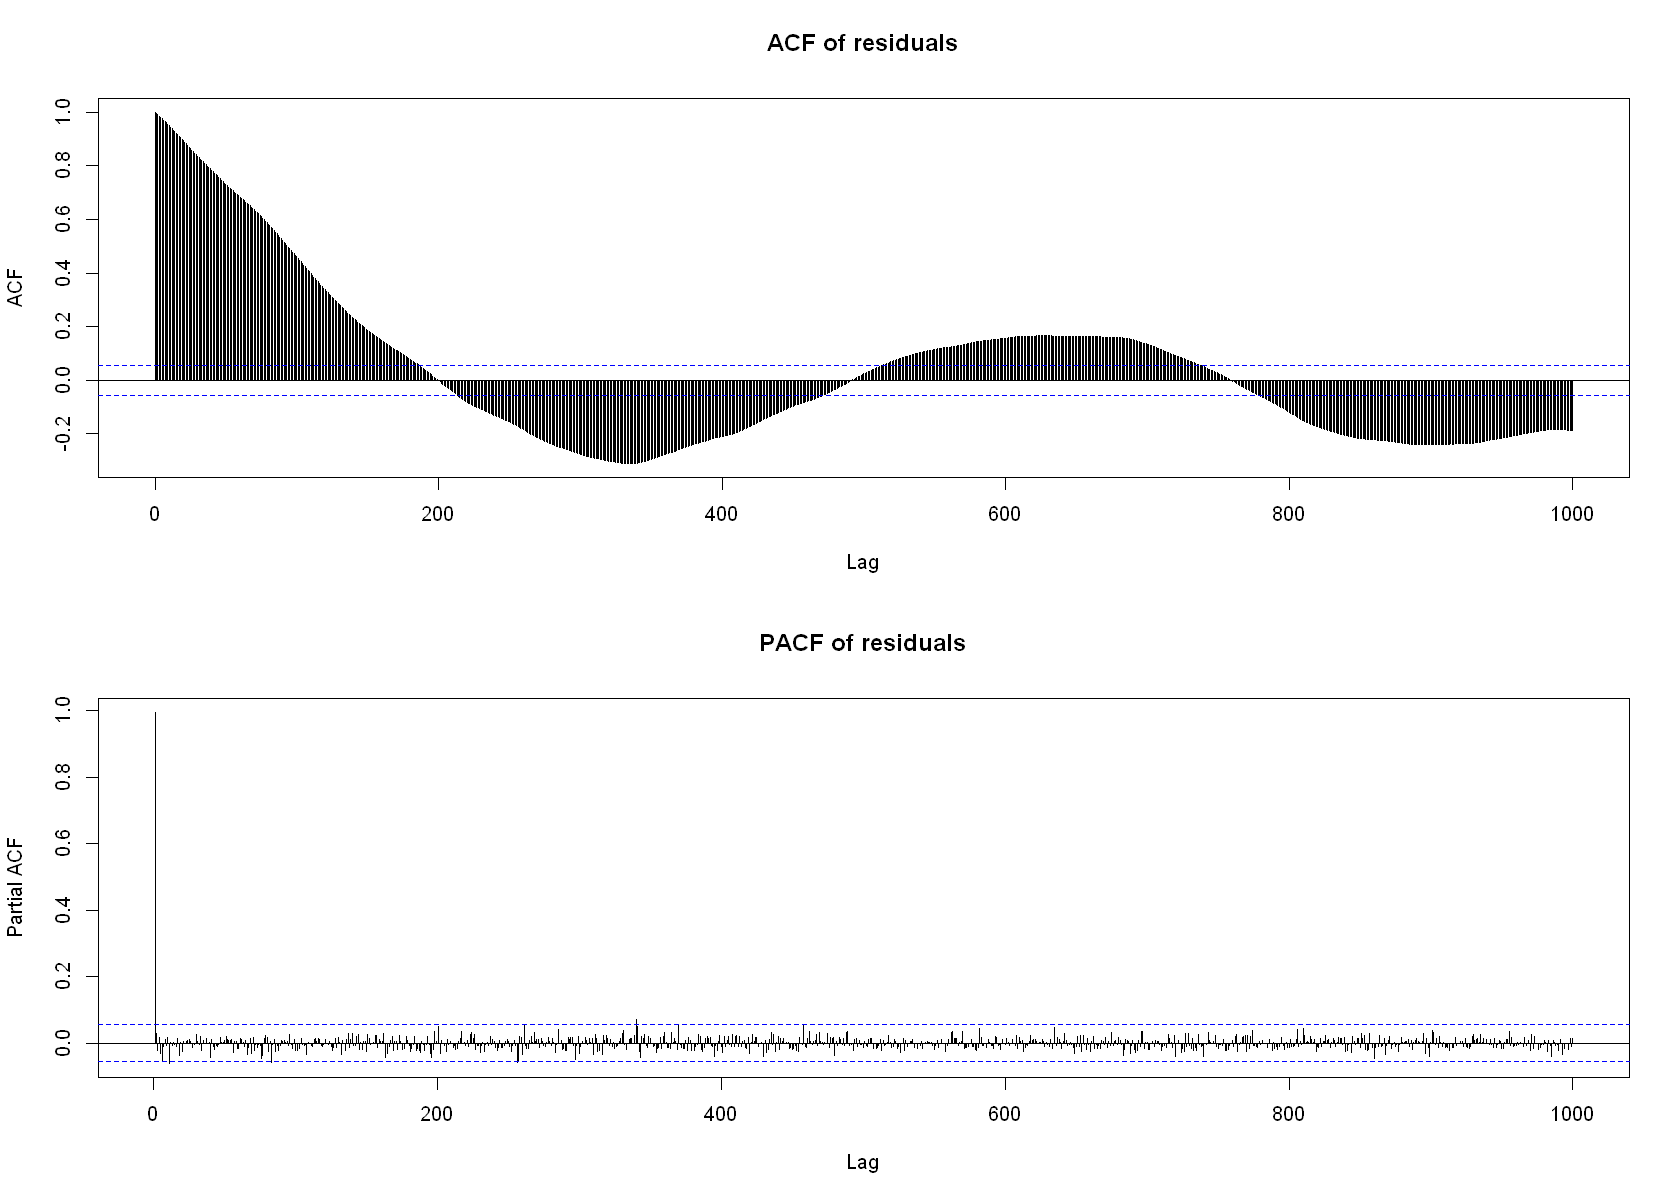

In [171]:
par(mfrow=c(2,1))
options(repr.plot.width=14,repr.plot.height=10)
acf(log(Bitcoin$Close), main="ACF of residuals", lag.max = 1000)
pacf(log(Bitcoin$Close), main="PACF of residuals", lag.max = 1000)

+ The **ACF** and **PACF** suggest this data is taking a Random Walk, so a single difference should be applied to achieve the stationarity of the series.
+ The gradual decay of the **ACF** tells us that we should difference the data. 

<div class="alert alert-block alert-info">
<b> </b>
</div>

## First Difference
+ A first difference is applied to make the data more stationary.

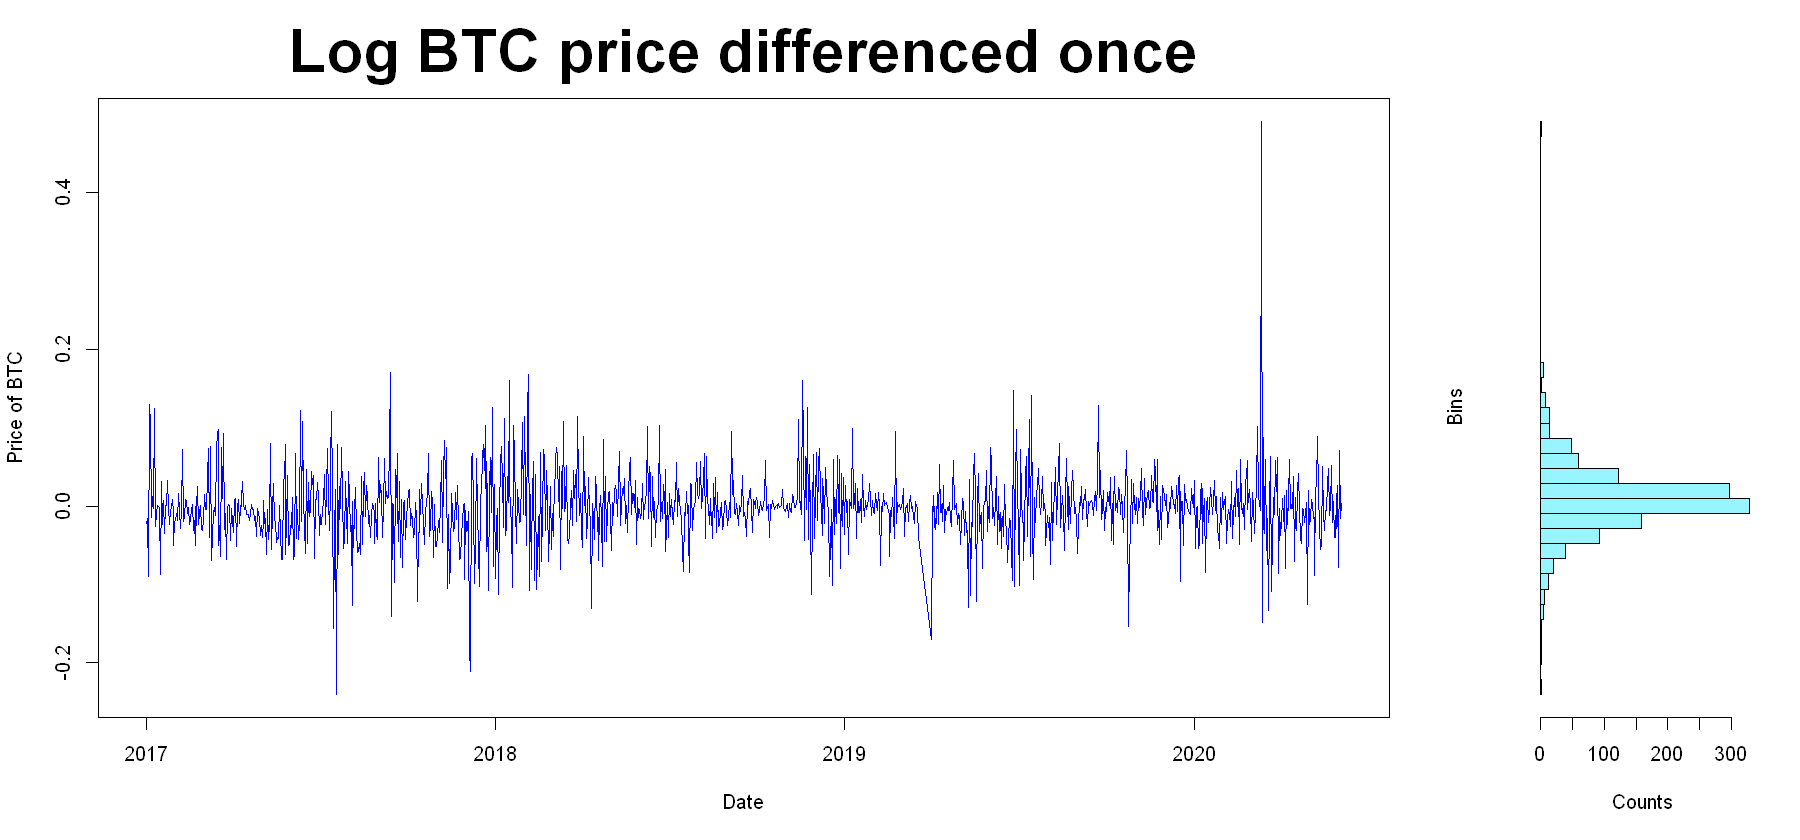

In [172]:
options(repr.plot.width=15,repr.plot.height=7)

### Log BTC price differenced once
par(fig=c(0,0.8,0,1), new=TRUE)
plot(x = as.Date(Bitcoin$Date)[-1], y = diff(log(Bitcoin$Close)), type="l",
     main="Log BTC price differenced once", cex.main = 3, col="blue", xlab= "Date", ylab="Price of BTC")
par(fig=c(0.8,1,0,1),new=TRUE)

### Support of Log BTC price differenced once
xhist <- hist(diff(log(Bitcoin$Close)), breaks = 50, plot = FALSE)
barplot(xhist$counts, space = 0, horiz=TRUE, xlab= "Counts", ylab="Bins", col="cadetblue1")

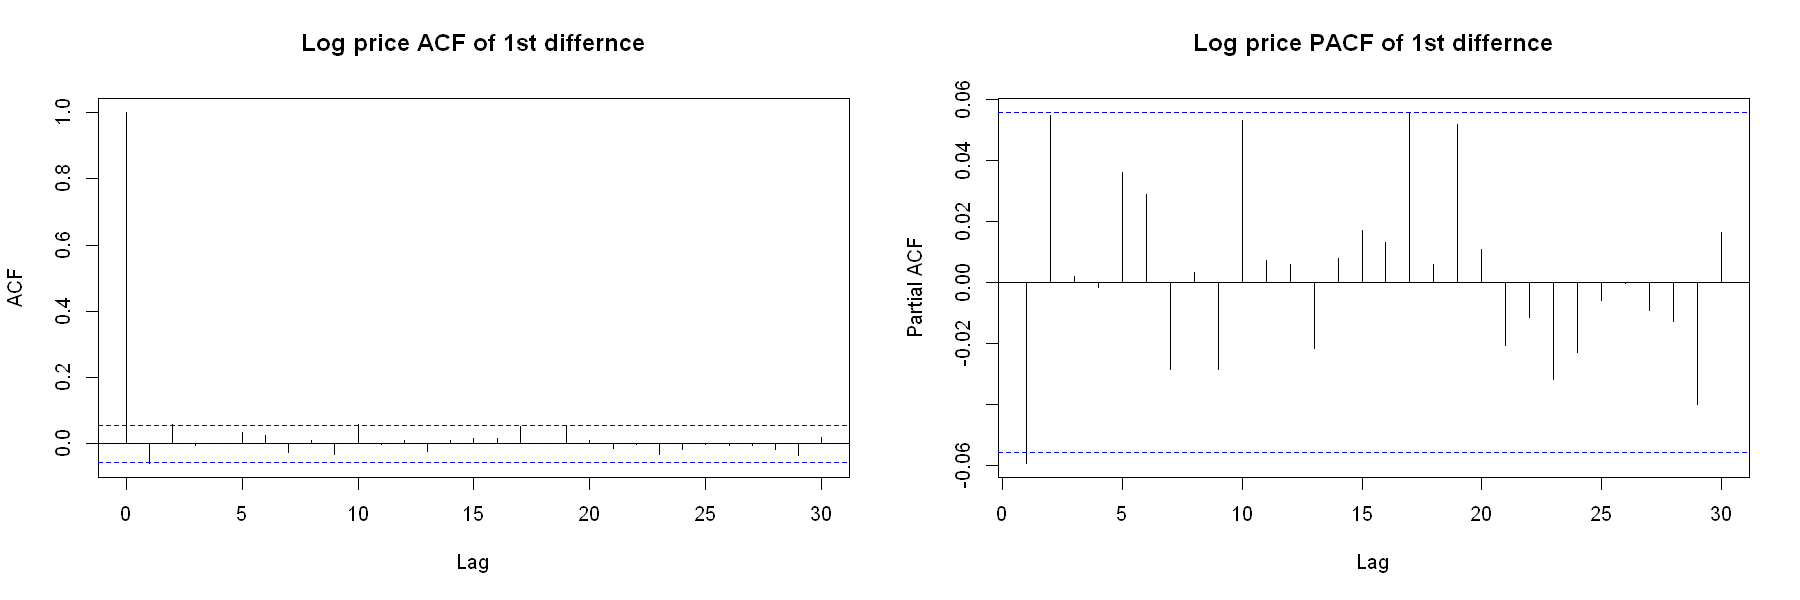

In [173]:
options(repr.plot.width=15,repr.plot.height=5)
par(mfrow=c(1,2))
acf(diff(log(Bitcoin$Close)),  main="Log price ACF of 1st differnce")
pacf(diff(log(Bitcoin$Close)), main="Log price PACF of 1st differnce")

+ We see that the data is **not stationary yet** because the variance is not constant. Although it follows a normal distribution with mean 0 as seen in the barplot in the right.
+ Another **transformation** must be performed on the data to obtain a constant variance.

<div class="alert alert-block alert-info">
<b> </b>
</div>

## Box-Cox Transformation

<img src="boxcox-formula-1.png">

" At the core of the Box Cox transformation is an exponent, lambda (λ), which varies from -5 to 5. All values of λ are considered and the optimal value for your data is selected; The “optimal value” is the one which results in the best approximation of a normal distribution curve. "
https://www.statisticshowto.com/box-cox-transformation/

+ A **Box Cox transformation** is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.
+ With this we try to **achieve a even more constant variance** and helping to normalize the data.

In [174]:
Bitcoin$LogBoxCox <- log(BoxCox(Bitcoin$Close, lambda = BoxCox.lambda(Bitcoin$Close)))

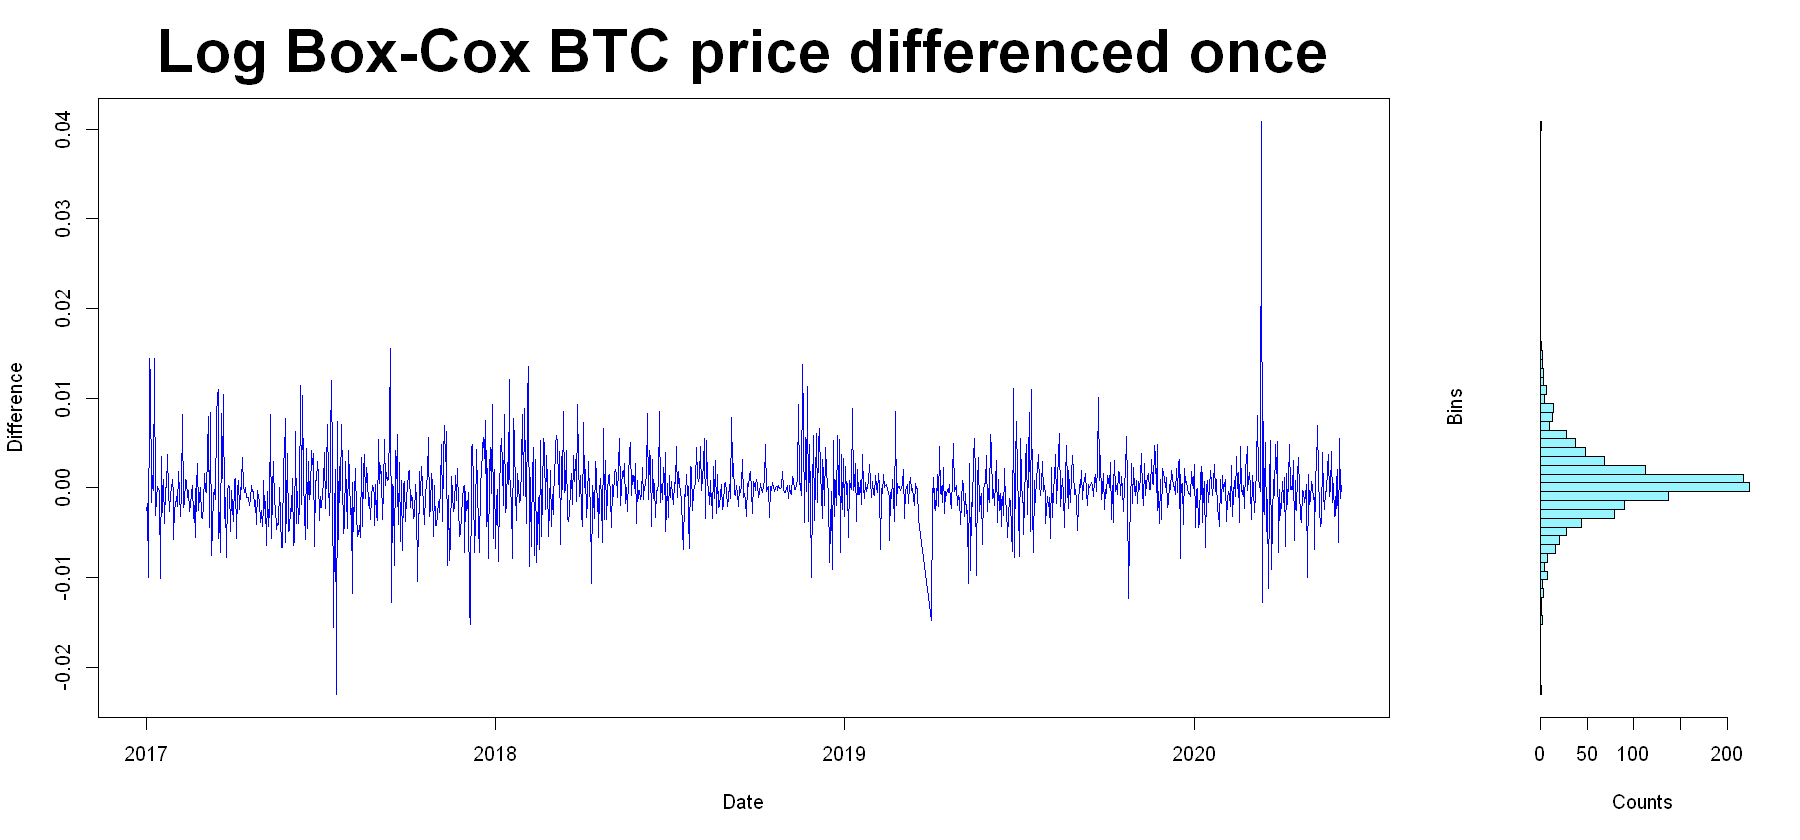

In [175]:
options(repr.plot.width=15,repr.plot.height=7)

par(fig=c(0,0.8,0,1), new=TRUE)
plot(x = as.Date(Bitcoin$Date)[-1], y = diff(Bitcoin$LogBoxCox), type="l",
     main="Log Box-Cox BTC price differenced once", cex.main = 3, col="blue", xlab= "Date", ylab="Difference")
par(fig=c(0.8,1,0,1),new=TRUE)

xhist <- hist(diff(Bitcoin$LogBoxCox), breaks = 50, plot = FALSE)
barplot(xhist$counts, space = 0, horiz=TRUE, xlab= "Counts", ylab="Bins", col="cadetblue1")

+ The peek in the difference for 2020 is suggestes to be because COVID-19 outbreak.
+ Apart from this, the data now has a **very low difference** and a **smaller variance (about 0.01)**. Thus, the trend has been nullified by the differencing.
+ The distribution of the Log Box-Cox BTC price follows a **normal distibution with mean 0**.


	Augmented Dickey-Fuller Test

data:  diff(Bitcoin$LogBoxCox)
Dickey-Fuller = -10.048, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


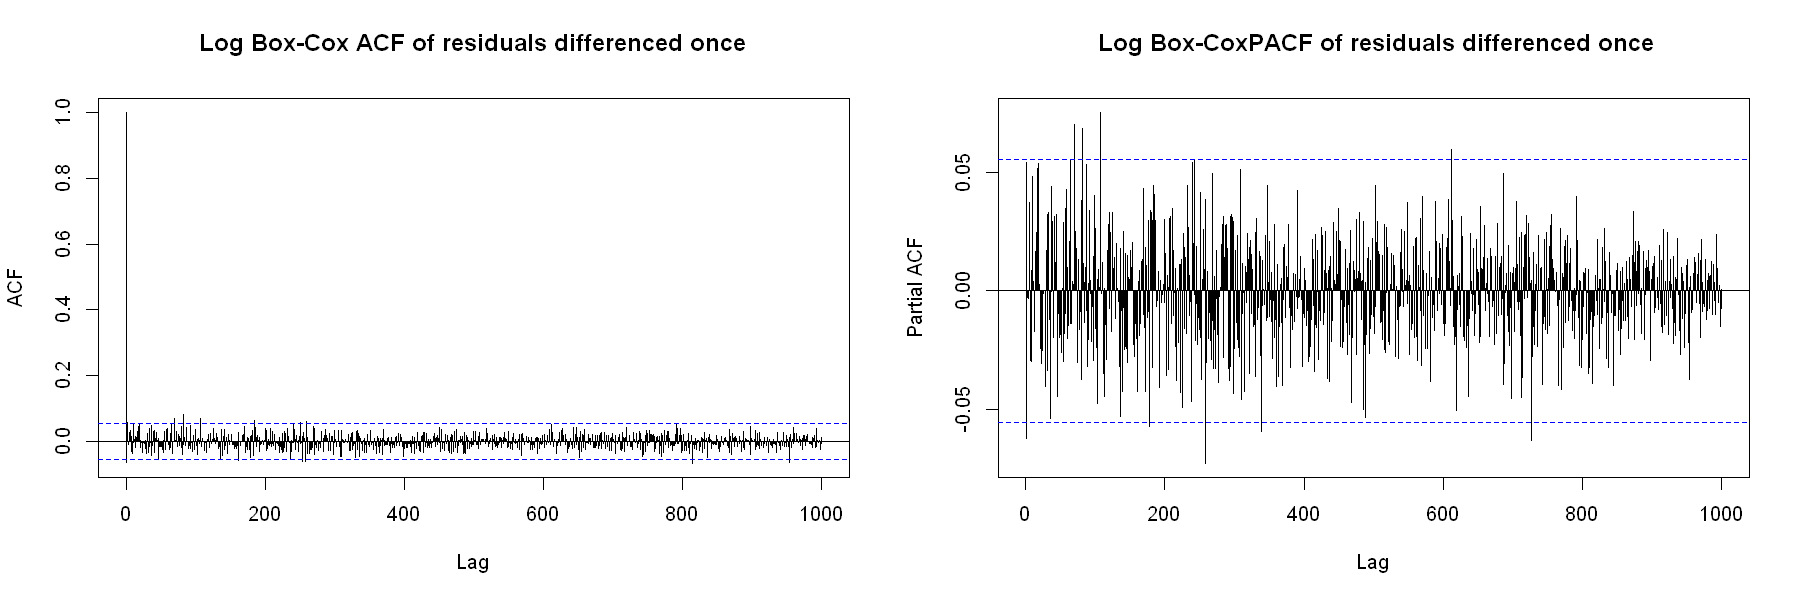

In [176]:
options(repr.plot.width=15,repr.plot.height=5)
par(mfrow=c(1,2))
acf(diff(Bitcoin$LogBoxCox), main="Log Box-Cox ACF of residuals differenced once", lag.max = 1000)
pacf(diff(Bitcoin$LogBoxCox), main=" Log Box-CoxPACF of residuals differenced once", lag.max = 1000)
adf.test(diff(Bitcoin$LogBoxCox))

+ Now the differenced values are even smaller for ACF and PACF.
+ The p-value obtained in the Augmented Dicky Fuller test is 0.01, being lower than confidence level at 0.05 gives. Hence, we can reject the null hypothesis and afirm that the data is stationary after the differencing.

<div class="alert alert-block alert-info">
<b> </b>
</div>

## Fit model and goodness of fit

In [177]:
### SEE THE DIFFERENCE OF MODELS WITH BOXCOX TRANSF. AND WITHOUT.
arima_model_close <-auto.arima(log(Bitcoin$Close))
arima_model_BoxCox <-auto.arima(Bitcoin$LogBoxCox)
garch_model_BoxCox <- garch(Bitcoin$LogBoxCox, order = c(1,1), trace=F)


# CHECK THE DIFFERENT ACCURACIES
### LOG BITCOIN$CLOSE
cat("-----------------------auto.arima(log(Bitcoin$Close))-------------------------------")
accuracy(arima_model_close)
arima_model_close

### LOG BOXCOX MODEL DIFF.
cat("\n-----------------------auto.arima(Bitcoin$LogBoxCox)-------------------------------")
accuracy(arima_model_BoxCox)
arima_model_BoxCox

### LOG BOXCOX MODEL DIFF. TO GARCH
cat("\n-----------------------garch(Bitcoin$LogBoxCox)-------------------------------")
garch_model_BoxCox
cat("GARCH(1,1) AIC: ", AIC(garch_model_BoxCox))

-----------------------auto.arima(log(Bitcoin$Close))-------------------------------

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.001817173,0.04541886,0.03037793,-0.02416406,0.3538583,1.001181,-0.002065914


Series: log(Bitcoin$Close) 
ARIMA(0,1,2) 

Coefficients:
          ma1     ma2
      -0.0541  0.0585
s.e.   0.0284  0.0282

sigma^2 estimated as 0.002068:  log likelihood=2070.55
AIC=-4135.11   AICc=-4135.09   BIC=-4119.74


-----------------------auto.arima(Bitcoin$LogBoxCox)-------------------------------

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.444334e-06,0.003873351,0.002583131,-0.0004306443,0.1389992,0.9994481,-0.0007611282


Series: Bitcoin$LogBoxCox 
ARIMA(0,1,2) with drift 

Coefficients:
          ma1     ma2   drift
      -0.0577  0.0567  -2e-04
s.e.   0.0284  0.0283   1e-04

sigma^2 estimated as 1.505e-05:  log likelihood=5118.37
AIC=-10228.74   AICc=-10228.71   BIC=-10208.26


-----------------------garch(Bitcoin$LogBoxCox)-------------------------------


Call:
garch(x = Bitcoin$LogBoxCox, order = c(1, 1), trace = F)

Coefficient(s):
       a0         a1         b1  
2.678e-01  9.649e-01  2.647e-15  


GARCH(1,1) AIC:  5060.818

+ We can see that the errors with the auto arima(Bitcoin-LogBoxCox) are smaller and also it has a smaller AIC score, thus thsi is a better fit for the model.
+ The best model obtained from the auto ARIMA is an $ARIMA(0,1,2)$ with drift from the Bitcoin-LogBoxCox. This drift is obtained becaues the difference is 1, $(d=1)$ and it shows that there is a trend with slope $μ=-2e-04$.
+ A GARCH model was considered.  but the Akaike information criterion was very low in comparison with the ARIMA models, and thus, it was discarted.
+ Note that the data without the LogBoxCox transformation also obtains as the best model an $ARIMA(0,1,2)$.

<div class="alert alert-success" role="alert">
Last, we use the Ljung-Box test to check is the data is IID. Let's see what are the hypothesis of the test:

$H_0:$ The data are independently distributed.

$H_a:$ The data are not independently distributed.
</div>



	Ljung-Box test

data:  Residuals from ARIMA(0,1,2) with drift
Q* = 8.3657, df = 7, p-value = 0.3015

Model df: 3.   Total lags used: 10



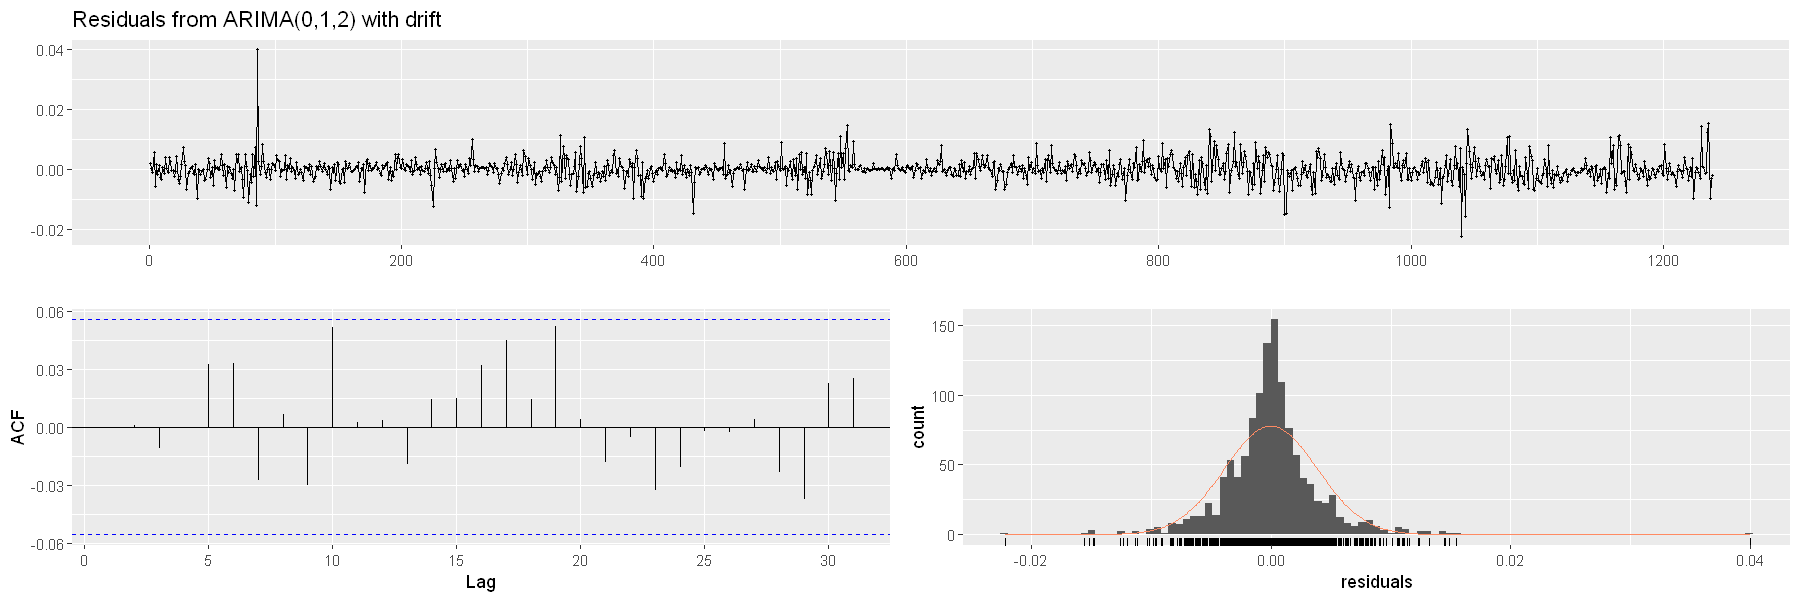

In [178]:
 # Produces a time plot of the residuals, the corresponding ACF, and a histogram
checkresiduals(arima_model_BoxCox)

+ First, we see the **Ljung-Box test** of the residuals of the model. Because the p-value is 0.3015, the null hypothesis can't be rejected an thus, the data are independently distributed.
+ The first plot we see the is for the residuals from the fitted model. The residuals seem to be similar to a **white noise** with a constant mean an almost constant and small variance.
+ On the bottom left we see the **ACF** from the residuals. We also see that it looks like a white noise because there is no significant lag.
+ Last, in the bottom right we see that the **residuals** follow a kind of close to normal distribution with a high concentration with residuals of value 0.

<div class="alert alert-success" role="alert">
We use the Augmented Dickey-Fuller test to check trend-stationary. Let's see what are the hipotseis of the test:

$H_0:$  A unit root is present in a time series sample. Non stationary time series, and that the process is integrated of order 0.

$H_a:$ The time series is stationary (or trend-stationary). Process integrated of order k>0.
</div>


In [179]:
adf.test(Bitcoin$LogBoxCox)
adf.test(diff(Bitcoin$LogBoxCox))


	Augmented Dickey-Fuller Test

data:  Bitcoin$LogBoxCox
Dickey-Fuller = -0.89625, Lag order = 10, p-value = 0.953
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(Bitcoin$LogBoxCox)
Dickey-Fuller = -10.048, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


+ Because the **p-value is 0.95** we can't reject the null hypothesis and we afirm that the time series is **not stationary**. 
+ But if we difference once the data, the **p-value drops to 0.01**. Now we can reject the null and say that the time series is stationary if differenced once $(d=1)$ to remove the stockhastic trend.

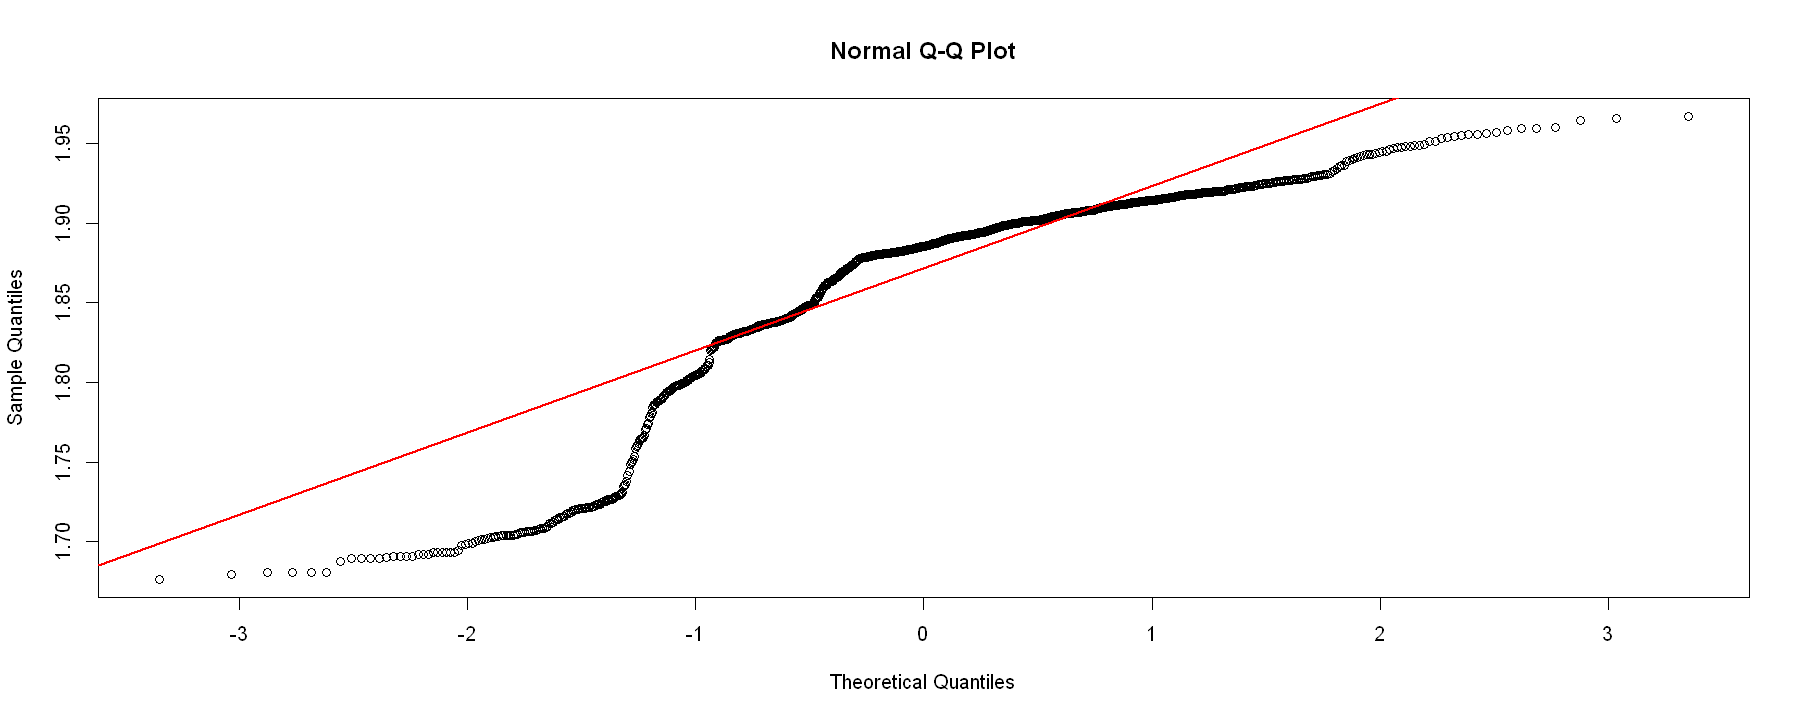

In [180]:
options(repr.plot.width=15,repr.plot.height=6)

qqnorm(Bitcoin$LogBoxCox ,main = "Normal Q-Q Plot")
qqline(Bitcoin$LogBoxCox ,col="red", lwd=2)

+ The values for the processes seem to deviate in all cases from the normal distribution (red line) in the tails. This could be an indication that this is a heavy tailed distributaion.

<div class="alert alert-block alert-info">
<b> </b>
</div>

## Price prediction

In [134]:
Bitcoin_head

,Date,Symbol,Open,High,Low,Close,Volume.BTC,Volume.USD,LogBoxCox
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-06-04,BTCUSD,9668.07,9689.84,9601.01,9637.12,563.76,5446482,6.781209
2,2020-06-03,BTCUSD,9522.46,9668.29,9385.22,9668.07,6384.32,60912269,6.782902
3,2020-06-02,BTCUSD,10219.97,10237.59,9285.39,9522.46,14210.84,139721993,6.774883
4,2020-06-01,BTCUSD,9446.57,10350.01,9417.42,10219.97,8439.12,81881425,6.812167
5,2020-05-31,BTCUSD,9700.33,9705.60,9384.54,9446.57,6146.96,58706362,6.770651
6,2020-05-30,BTCUSD,9423.87,9744.06,9346.81,9700.33,3690.72,35294093,6.784661
7,2020-05-29,BTCUSD,9580.19,9609.02,9330.01,9423.87,9945.05,94028684,6.769378
8,2020-05-28,BTCUSD,9208.53,9625.00,9112.00,9580.19,13637.01,127942111,6.778078
9,2020-05-27,BTCUSD,8844.42,9230.00,8811.46,9208.53,10460.35,94984995,6.757138


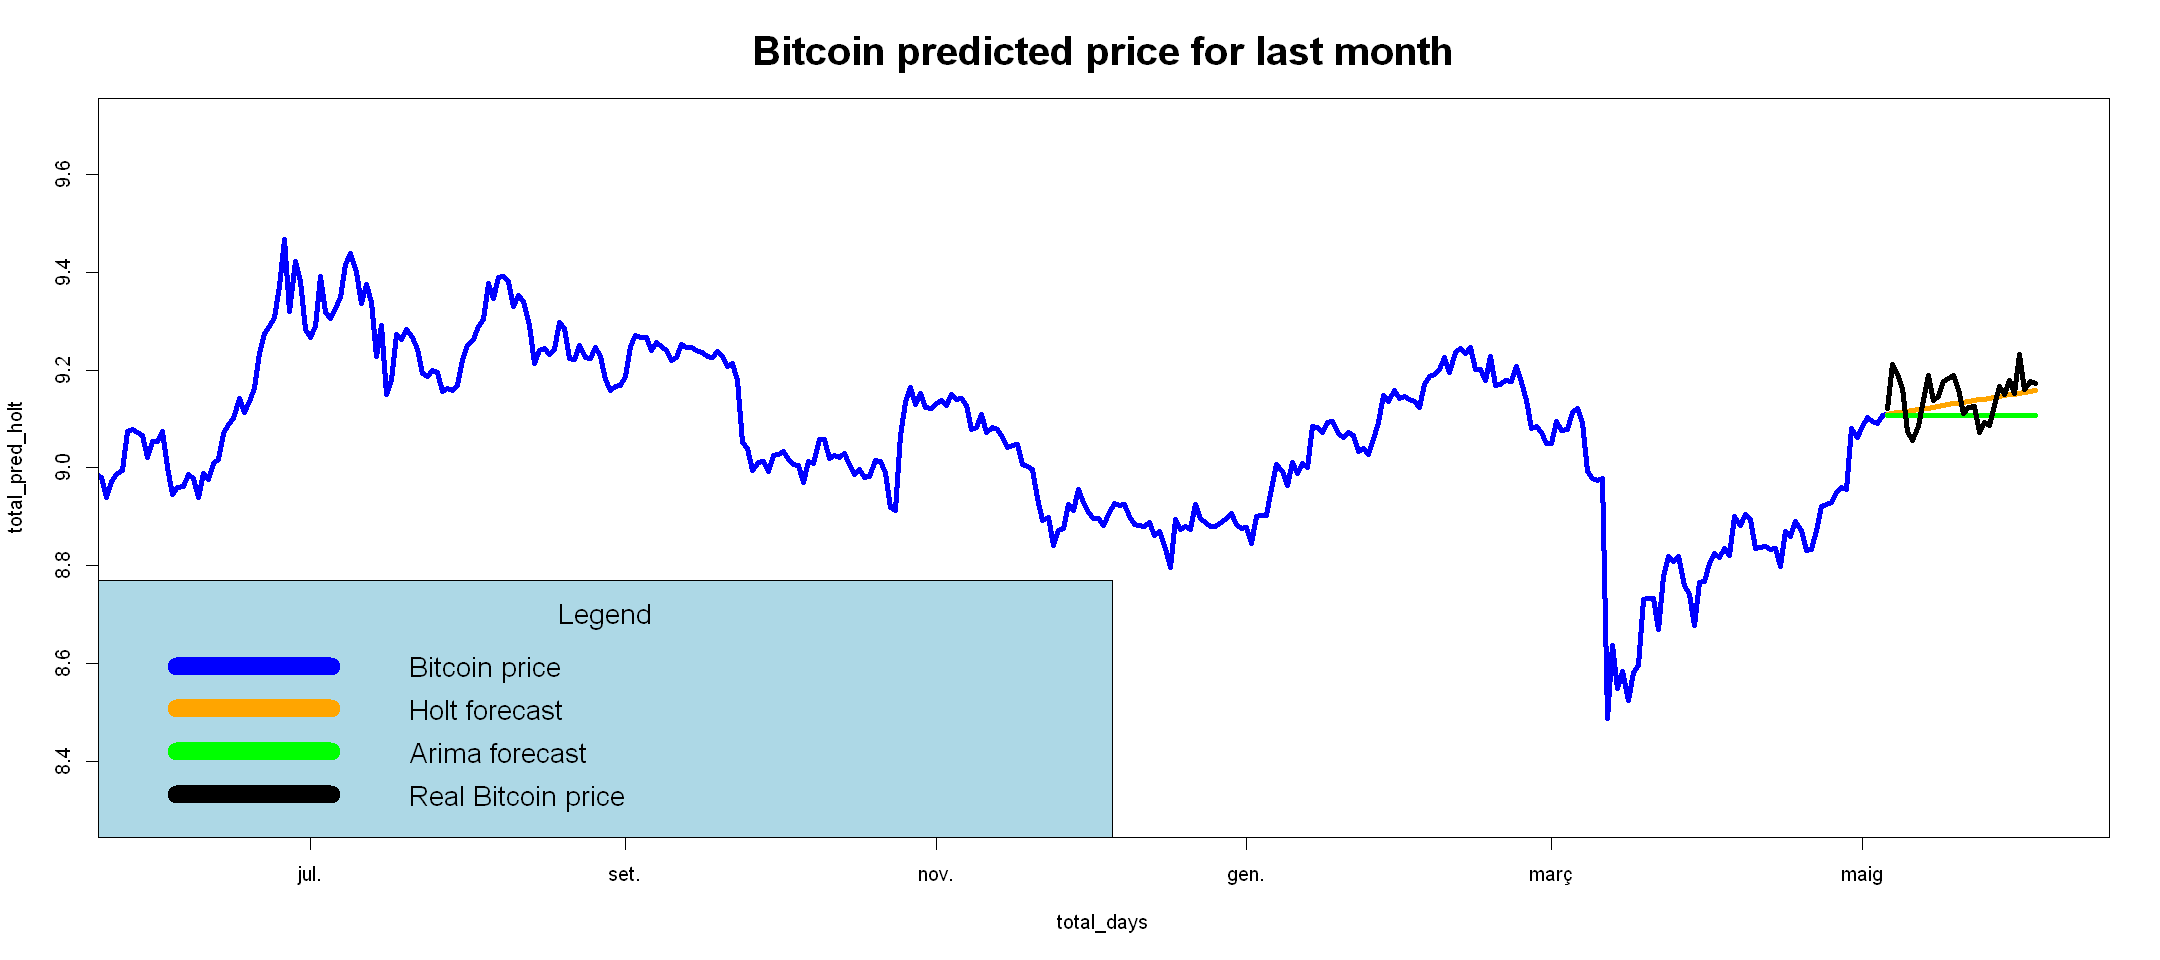

In [32]:
day_pred <- 30

### TRAINING SET
Bitcoin_trimed <- tail(Bitcoin, length(Bitcoin$Close)-day_pred)

### TESTING SET
Bitcoin_head <- head(Bitcoin, day_pred)

### TWO DIFFERENT FORCAST TECHIQUES
# Holt: extended simple exponential smoothing to allow the forecasting of data with a trend.
BTC.forecast.holt<-holt(rev(log(Bitcoin_trimed$Close)), h = day_pred)
# Tipical method used in previous practices.
BTC.forecast.arima<-forecast(auto.arima(rev(log(Bitcoin_trimed$Close))), h = day_pred)

### CONCAT WITH PREVIOUS DATA
total_pred_holt <- c(rev(BTC.forecast.holt$mean),log(Bitcoin_trimed$Close))
total_pred_arima <- c((BTC.forecast.arima$mean),log(Bitcoin_trimed$Close))

### CREATE THE NEW DAYS TO PREDICT
new_days <- seq(max(as.Date(Bitcoin_trimed$Date))+1, max(as.Date(Bitcoin_trimed$Date))+day_pred, by = "1 days")
total_days <- c(rev(as.Date(new_days)),as.Date(Bitcoin_trimed$Date))

### PLOT
options(repr.plot.width=18,repr.plot.height=8)
plot(x = total_days, y = total_pred_holt, type="l", col="blue", xlim=as.Date(c("2019-06-04", "2020-06-04")),
     ylim=c(8.3, 9.7), main="Bitcoin predicted price for last month", cex.main=2, lwd=4) 
lines(x = total_days[0:day_pred], y = total_pred_holt[0:day_pred], col="orange", lwd=4) # HOLT
lines(x = total_days[0:day_pred], y = total_pred_arima[0:day_pred], col="green", lwd=4) # ARIMA
lines(x = total_days[0:day_pred], y = log(Bitcoin_head$Close), col="black", lwd=4)      # REAL PRICE

legend("bottomleft", legend=c("Bitcoin price", "Holt forecast", "Arima forecast", "Real Bitcoin price"),
       col=c("blue","orange","green","black"), lwd=15, cex=1.4,
       title="Legend", text.font=1, bg='lightblue')

+ In the plot above we can see the Log Bitcoin price for the last year. In here, the blue line represents the real price obtained from the Bitcoin platform. From 06/05/2020 to 04/06/2020, a prediction was performed for the 30 next days was performed:
    + The first method, in orange is the Holt-Winters forecasting method, also known as linear exponential smoothing was applied. The model predicts a current or future value by computing the combined effects of value, trend, and seasonality.
    + The second method, in green, is calling the forecast function with the previously fitted ARIMA model.
    + Finally, the black line represents the true price of Bitcoin this last 30 days.   
+ As we can see, the forecasting that better fits the real data is the Holt-Winters forecasting method (orange line).